In [2]:
import warnings

import numpy as np
import pandas as pd
import matplotlib as mpl
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_20newsgroups

from auto_explore.viz import *
from auto_explore.apis import fetch_fred_data
from auto_explore.datetime import make_calendars
from auto_explore.eda import AutopilotExploratoryAnalysis

mpl.rcParams['figure.figsize'] = (14, 9)
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# Fetch Some Toy Datasets

In [3]:
def get_wine_data():
    '''Fetches wine data from sklearn.datasets'''
    wine = load_wine()
    wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
    wine_df['target'] = wine['target']
    return wine_df

wine_df = get_wine_data()
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
def fetch_econ_data():
    series_list = ['SP500', 'NASDAQCOM', 'DJIA', 'RU2000PR']
    econ_df = fetch_fred_data(series_list)
    year_list = np.arange(2011, 2020)
    cal_df = make_calendars(year_list, drop_index=False)
    cal_df.index.name = 'DATE'
    df = cal_df.join(econ_df).dropna()
    df['date'] = df.index.values
    return df

econ_df = fetch_econ_data()
econ_df.head()

Calling FRED API for Series:  SP500
Calling FRED API for Series:  NASDAQCOM
Calling FRED API for Series:  DJIA
Calling FRED API for Series:  RU2000PR


,month,year,weekday,is_weekday,is_holiday,is_holiday_week,SP500,NASDAQCOM,DJIA,RU2000PR,date
DATE,,,,,,,,,,,
2011-01-03,January,2011,Monday,1,0,0,1271.87,2691.52,11670.75,1984.61,2011-01-03
2011-01-04,January,2011,Tuesday,1,0,0,1270.20,2681.25,11691.18,1952.99,2011-01-04
2011-01-05,January,2011,Wednesday,1,0,0,1276.56,2702.20,11722.89,1976.01,2011-01-05
2011-01-06,January,2011,Thursday,1,0,0,1273.85,2709.89,11697.31,1966.88,2011-01-06
2011-01-07,January,2011,Friday,1,0,0,1271.50,2703.17,11674.76,1957.96,2011-01-07


In [5]:
def fetch_iris():
    data = load_iris()
    iris_df = pd.DataFrame(data['data'], columns=data['feature_names'])
    iris_df['target'] = data['target']
    return iris_df

iris_df = fetch_iris()
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
year_list = np.arange(2011, 2020)
cal_df = make_calendars(year_list, drop_index=False)
cal_df.index.name = 'DATE'

cal_df.head()

,month,year,weekday,is_weekday,is_holiday,is_holiday_week
DATE,,,,,,
2011-01-01,January,2011,Saturday,0,0,0
2011-01-02,January,2011,Sunday,0,0,0
2011-01-03,January,2011,Monday,1,0,0
2011-01-04,January,2011,Tuesday,1,0,0
2011-01-05,January,2011,Wednesday,1,0,0


In [7]:
txt = fetch_20newsgroups(subset='train').data
txt[:5]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

# Examples

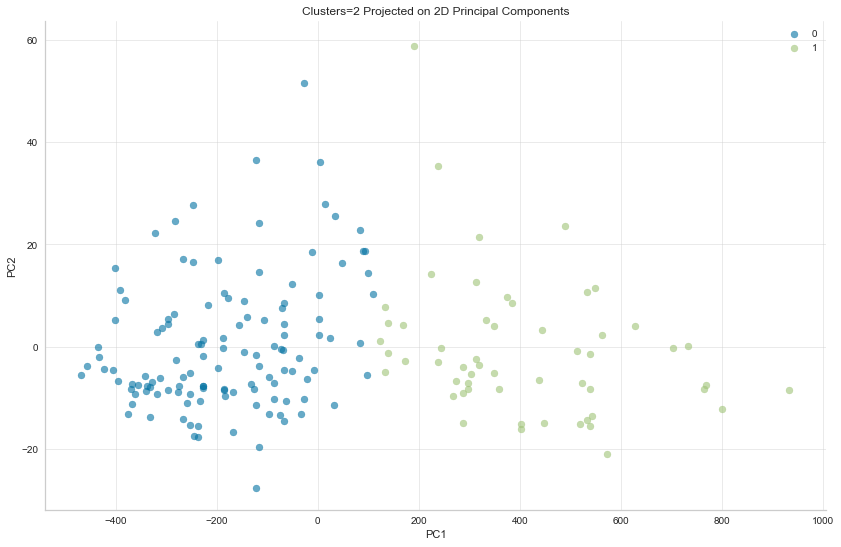

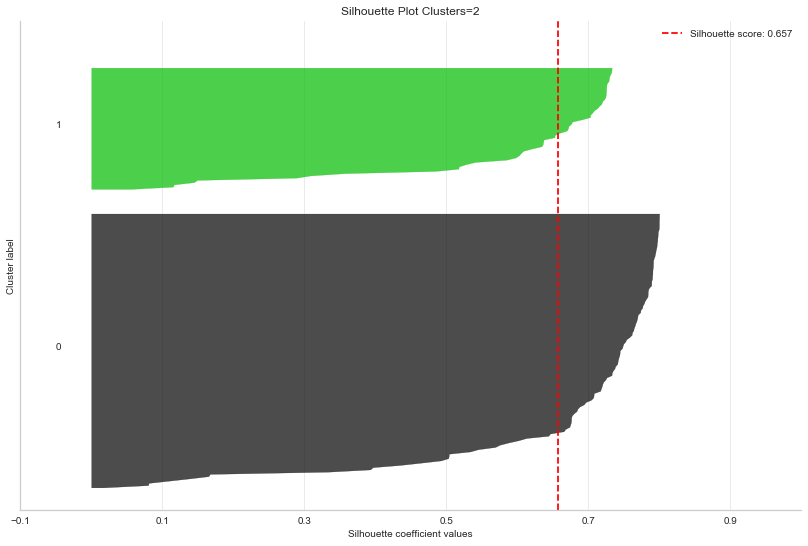

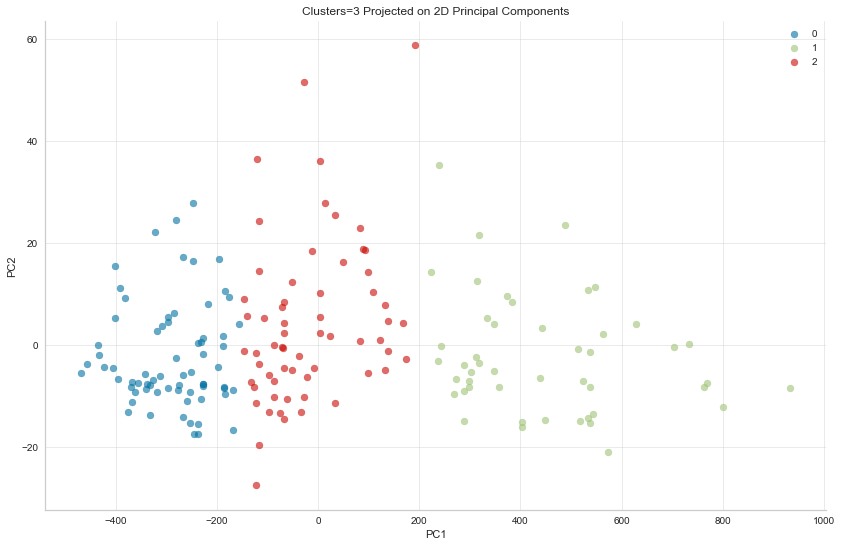

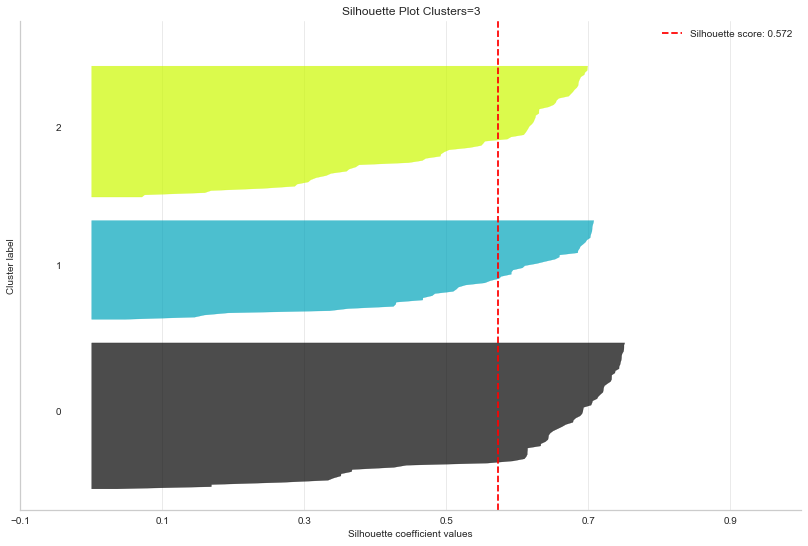

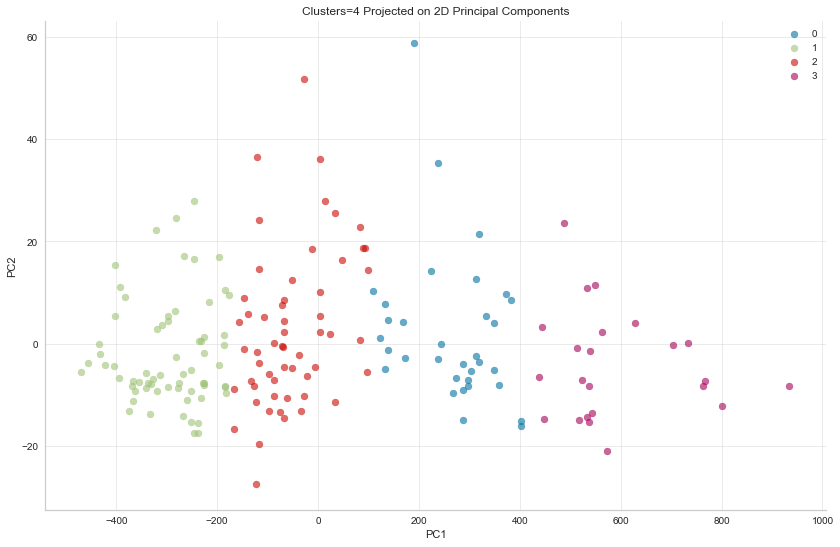

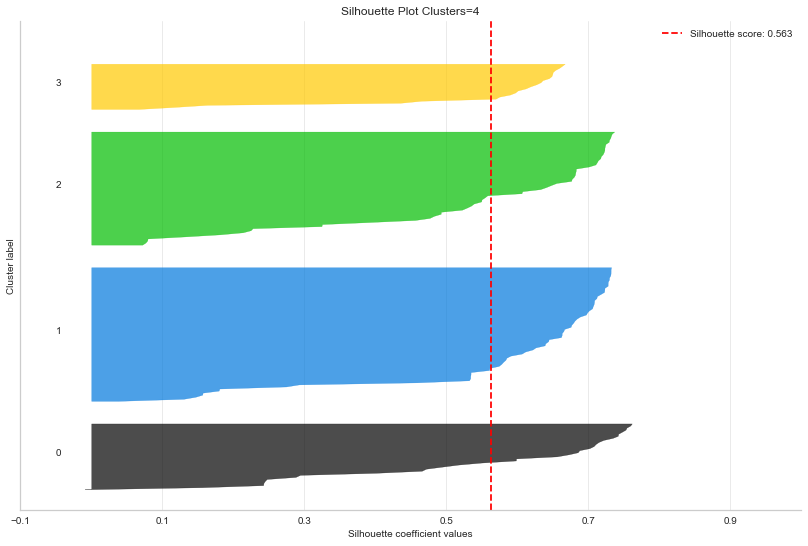

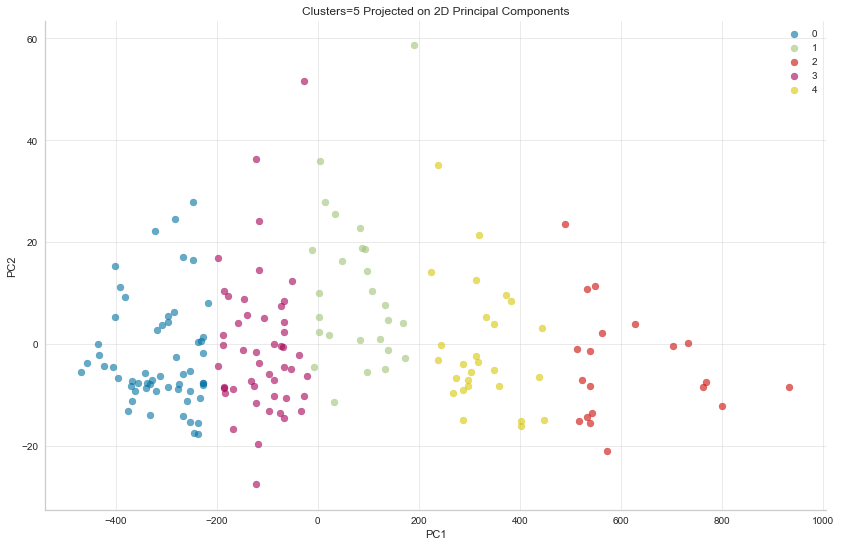

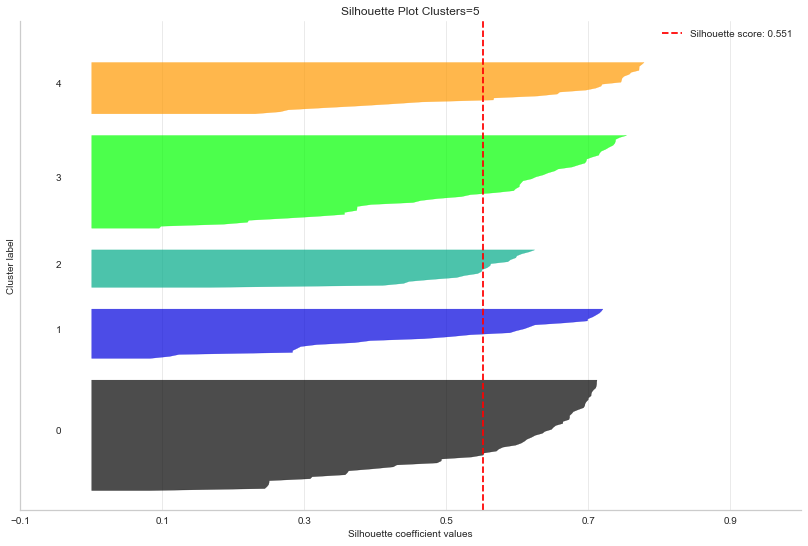

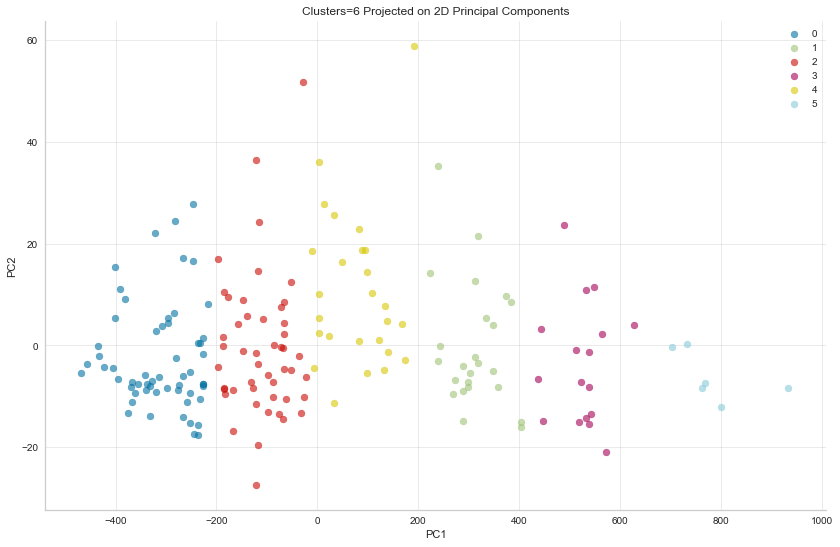

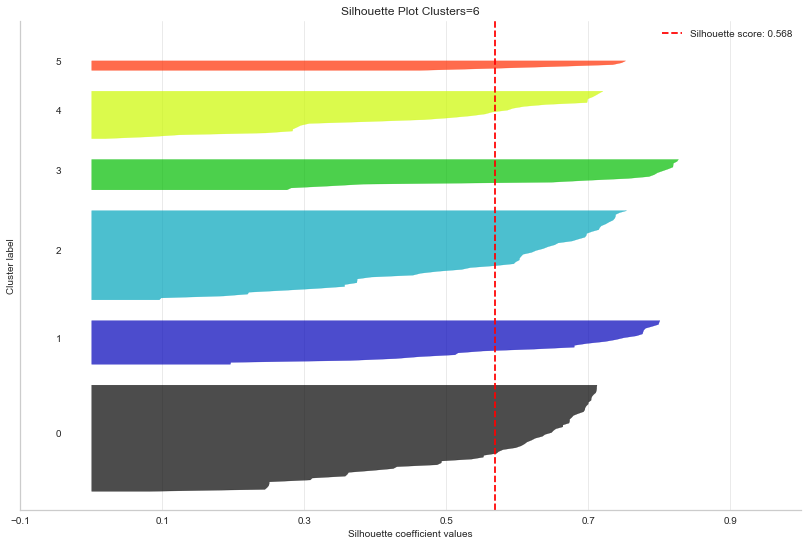

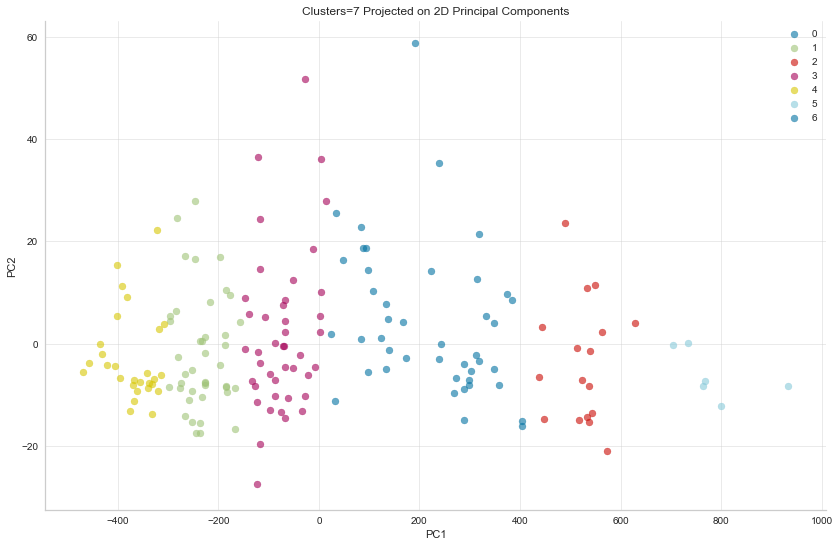

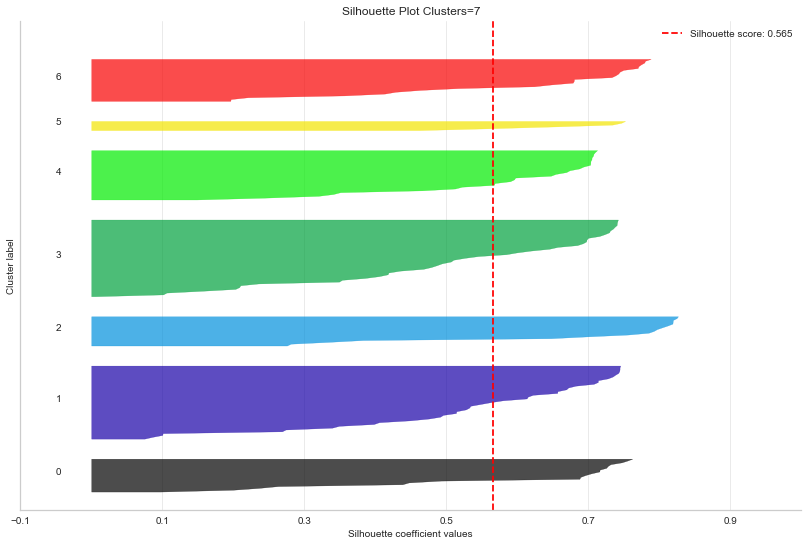

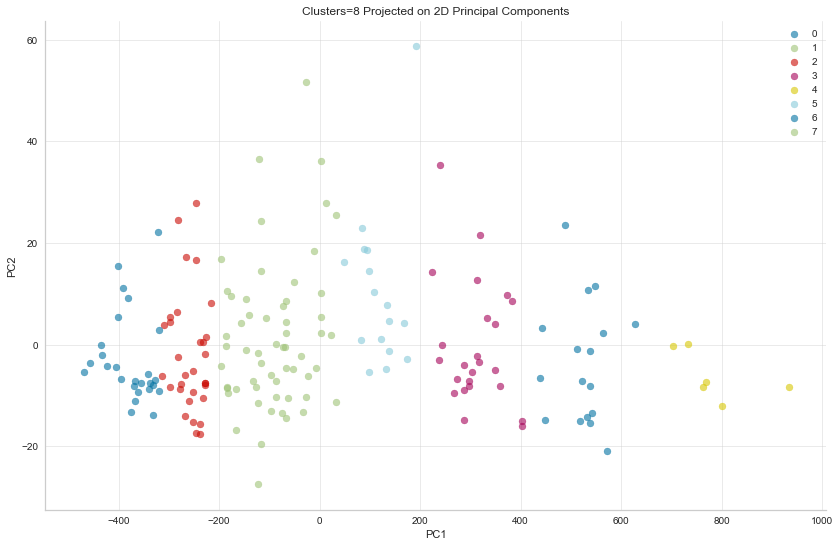

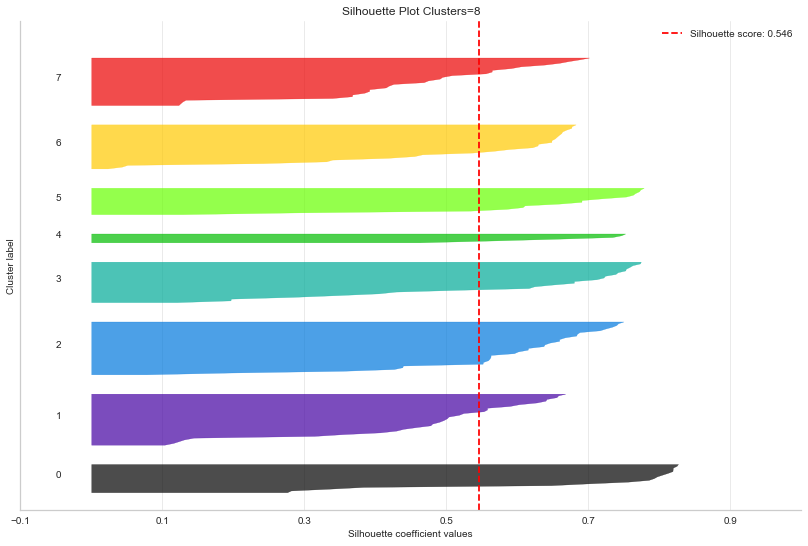

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=777, tol=0.0001, verbose=0)

In [8]:
cluster_and_plot_pca(wine_df)

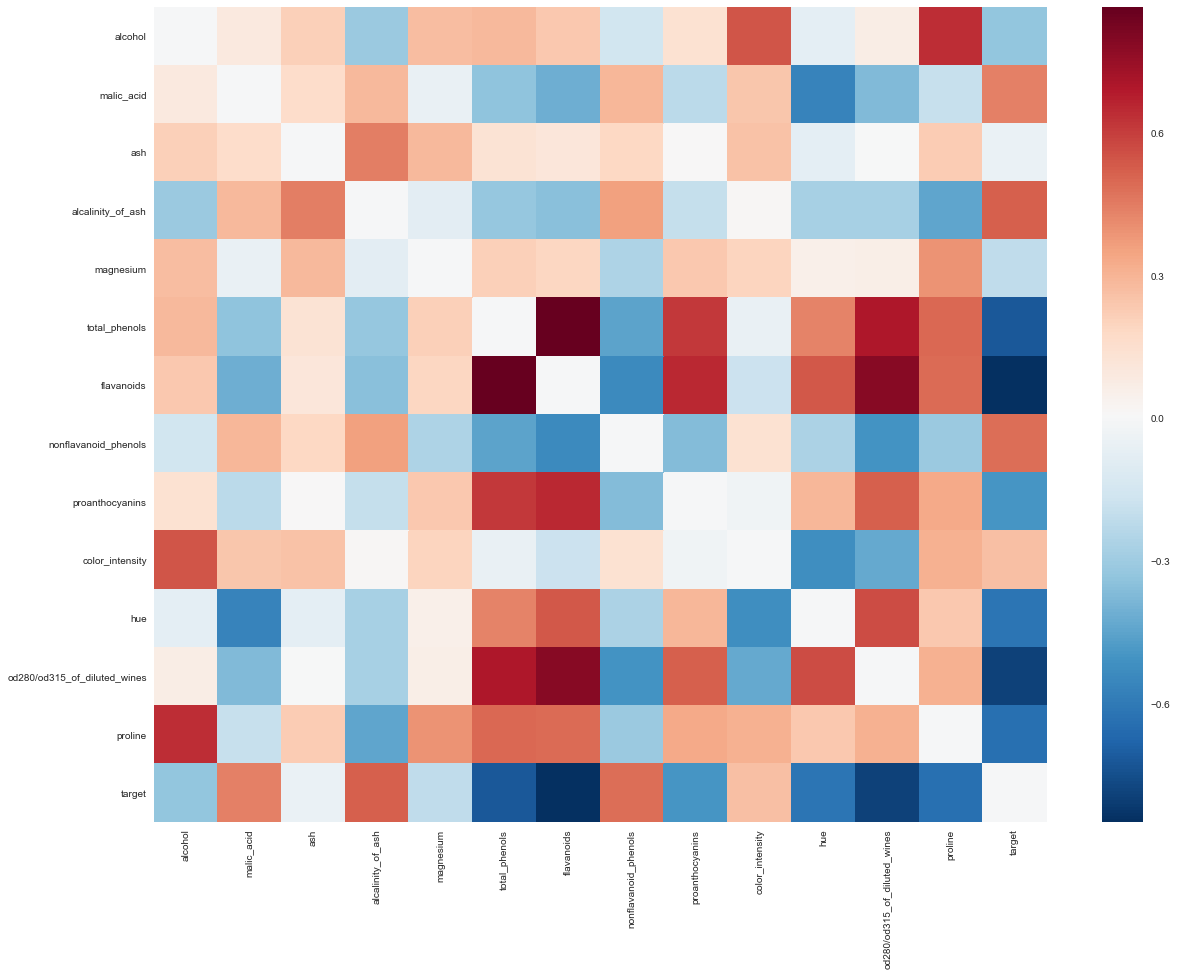

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,0.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,0.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,0.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,0.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,0.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,0.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,0.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,0.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,0.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,0.000000,-0.521813,-0.428815,0.316100,0.265668


In [9]:
correlation_heatmap(wine_df)

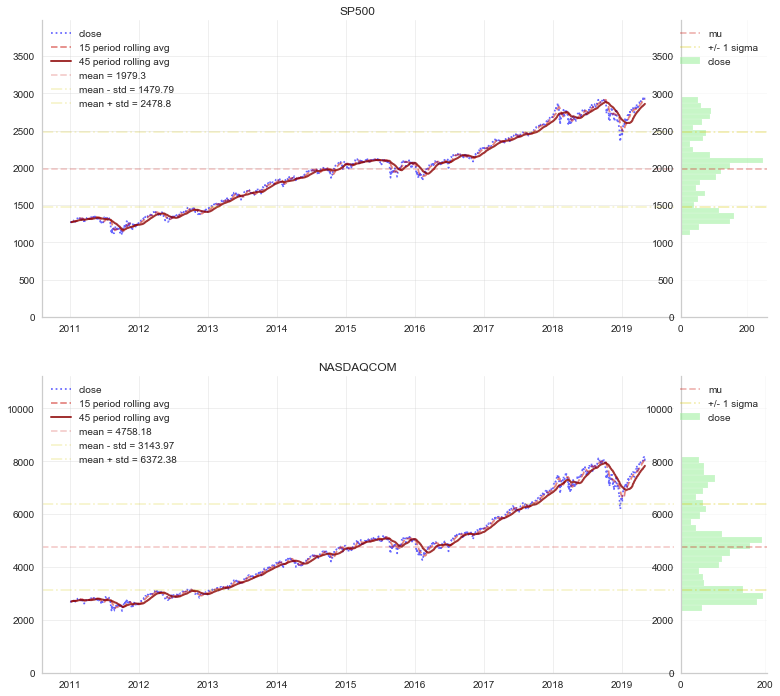

In [10]:
stack_df = pd.DataFrame(econ_df[['SP500', 'NASDAQCOM']].stack()).reset_index(drop=False)
stack_df.columns = ['date', 'ix', 'close']

plot_tseries_over_group_with_histograms(stack_df, 'date', 'close', 'ix')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

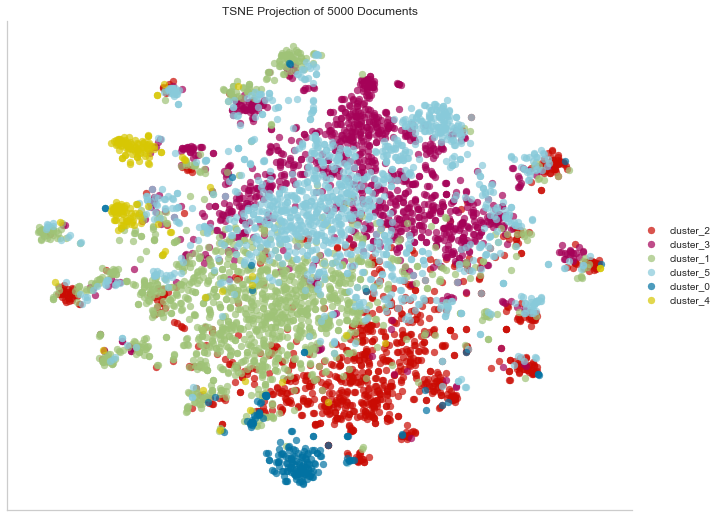

In [11]:
text_cluster_tsne(txt[:5000], n_clusters=6)

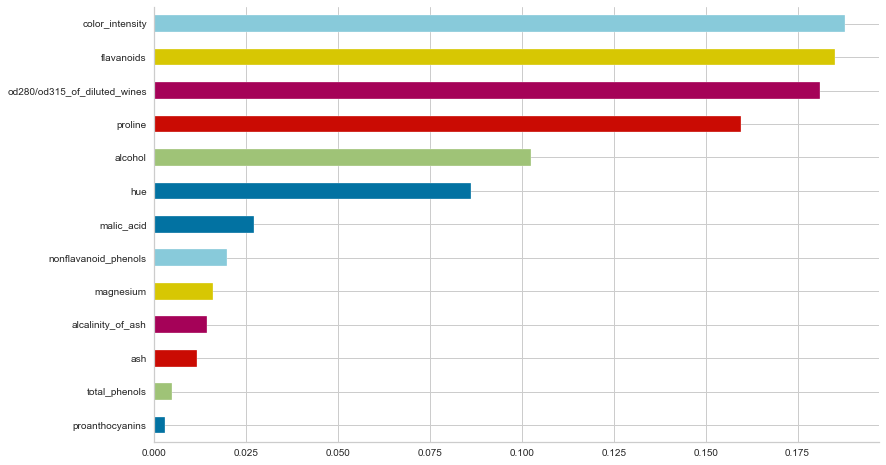

In [12]:
rf_feature_importances(wine_df.drop(columns='target'), wine_df.target)

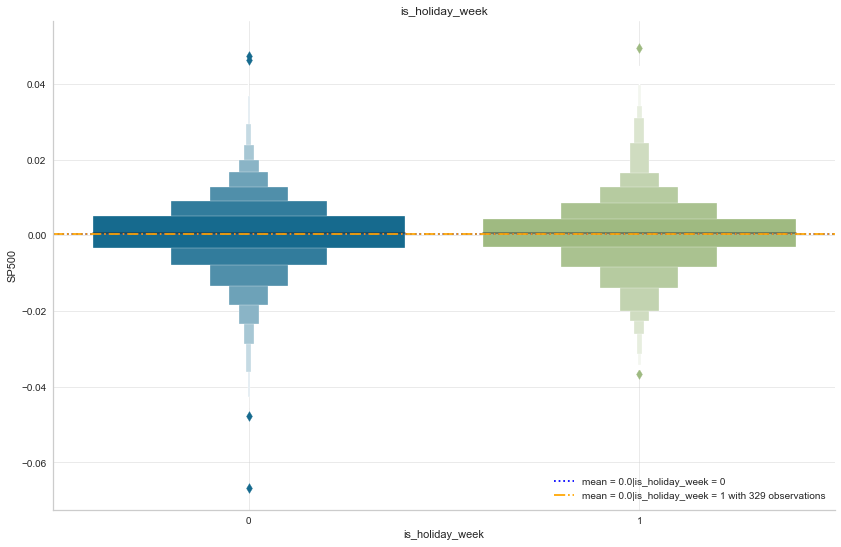

In [13]:
pct_chg_df = econ_df[['SP500', 'DJIA']].pct_change()
pct_chg_df['is_holiday_week'] = pct_chg_df.index.values
hol_map = dict(zip(cal_df.index.values, cal_df.is_holiday_week))
pct_chg_df['is_holiday_week'] = pct_chg_df['is_holiday_week'].map(hol_map)

target_distribution_over_binary_groups(pct_chg_df, ['is_holiday_week'], 'SP500')

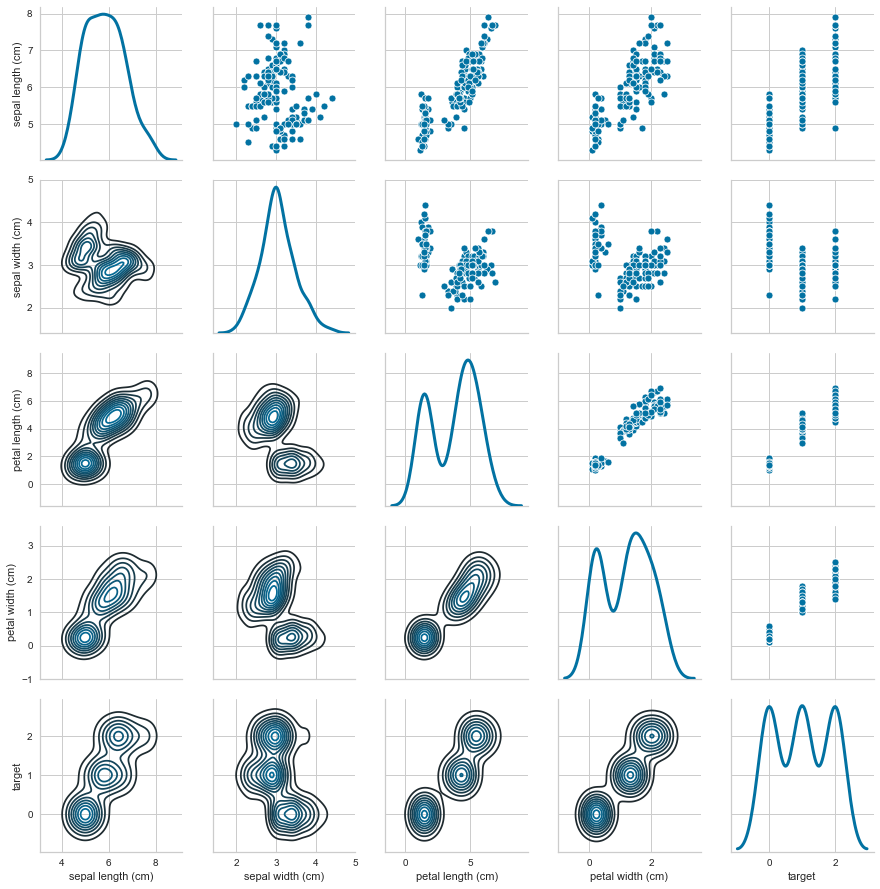

In [14]:
scatterplot_matrix_kde(iris_df)

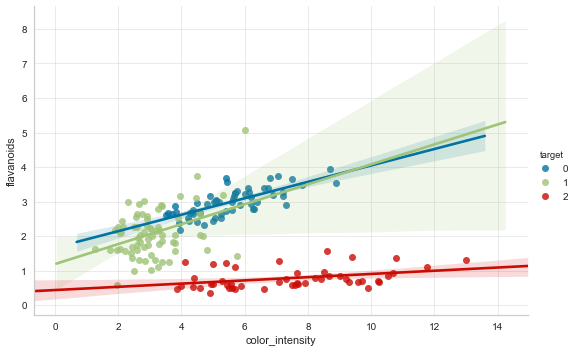

In [15]:
lm_group_plot(wine_df, 'color_intensity', 'flavanoids', 'target')